In [1]:
!pip install WordCloud

In [2]:
import pandas as pd
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud

# Download VADER
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\prate\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
df=pd.read_csv("C://Users//prate//Downloads///flipkart_product.csv", encoding='ISO-8859-1')

In [4]:
df.head()

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product


In [5]:
df.shape

(189874, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189874 entries, 0 to 189873
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ProductName  189874 non-null  object
 1   Price        189873 non-null  object
 2   Rate         189873 non-null  object
 3   Review       189870 non-null  object
 4   Summary      189860 non-null  object
dtypes: object(5)
memory usage: 7.2+ MB


In [7]:
df.describe()

,ProductName,Price,Rate,Review,Summary
count,189874,189873,189873,189870,189860
unique,812,561,9,1264,98343
top,MILTON Thermosteel Flip Lid 500 ml FlaskÂ Â (P...,"â¹1,299",5,Nan,Good
freq,9278,10005,108694,20862,14175


In [8]:
df.columns

Index(['ProductName', 'Price', 'Rate', 'Review', 'Summary'], dtype='object')

In [9]:
#Clean Price column
df['Price'] = df['Price'].astype(str).str.replace(r'[^\d]', '', regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [10]:
df.dropna(subset=['Summary', 'Price'], inplace=True)

In [11]:
#NLP preprocessing of 'Summary'
df['Summary_Clean'] = df['Summary'].astype(str).apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x.lower()))

#Sentiment analysis using VADER
df['Sentiment_Score'] = df['Summary_Clean'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [12]:
#Fake/Real Classification based on sentiment
def classify_review(row):
    text = row['Summary_Clean']
    score = row['Sentiment_Score']
    word_count = len(text.split())

    if word_count < 3:
        return 'fake'
    if score > 0.8 and any(w in text for w in ['good', 'excellent', 'nice', 'awesome']):
        return 'fake'
    if score < -0.5:
        return 'fake'
    return 'real'

df['Review_Type'] = df.apply(classify_review, axis=1)

In [13]:
df.head()

,ProductName,Price,Rate,Review,Summary,Summary_Clean,Sentiment_Score,Review_Type
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,5,Super!,Great cooler.. excellent air flow and for this...,great cooler excellent air flow and for this p...,0.9576,fake
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,5,Awesome,Best budget 2 fit cooler. Nice cooling,best budget fit cooler nice cooling,0.8591,fake
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,3,Fair,The quality is good but the power of air is de...,the quality is good but the power of air is de...,0.2382,real
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,1,Useless product,Very bad product it's a only a fan,very bad product its a only a fan,-0.3597,real
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,3,Fair,Ok ok product,ok ok product,0.5267,real


In [14]:
df.Review_Type

0         fake
1         fake
2         real
3         real
4         real
          ... 
189868    fake
189869    fake
189870    fake
189871    fake
189872    fake
Name: Review_Type, Length: 189860, dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189860 entries, 0 to 189872
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ProductName      189860 non-null  object 
 1   Price            189860 non-null  float64
 2   Rate             189860 non-null  object 
 3   Review           189857 non-null  object 
 4   Summary          189860 non-null  object 
 5   Summary_Clean    189860 non-null  object 
 6   Sentiment_Score  189860 non-null  float64
 7   Review_Type      189860 non-null  object 
dtypes: float64(2), object(6)
memory usage: 13.0+ MB


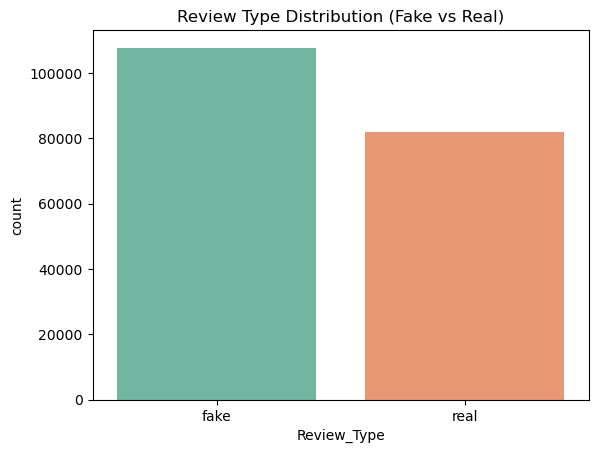

In [16]:
# Count plot
sns.countplot(data=df, x='Review_Type', palette='Set2')
plt.title("Review Type Distribution (Fake vs Real)")
plt.show()

Count of fake reviews is much greater than the real ones

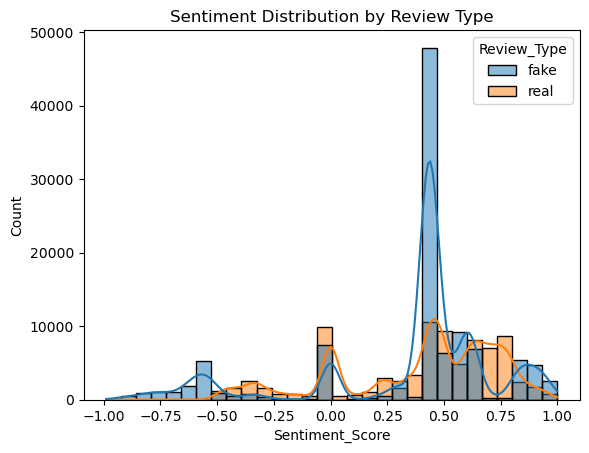

In [18]:
#Sentiment distribution by label
sns.histplot(data=df, x='Sentiment_Score', hue='Review_Type', bins=30, kde=True)
plt.title("Sentiment Distribution by Review Type")
plt.show()

In [19]:
#Word Cloud for real and fake reviews
real_text = ' '.join(df[df['Review_Type'] == 'real']['Summary_Clean'])
fake_text = ' '.join(df[df['Review_Type'] == 'fake']['Summary_Clean'])
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_text)
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_text)

(-0.5, 799.5, 399.5, -0.5)

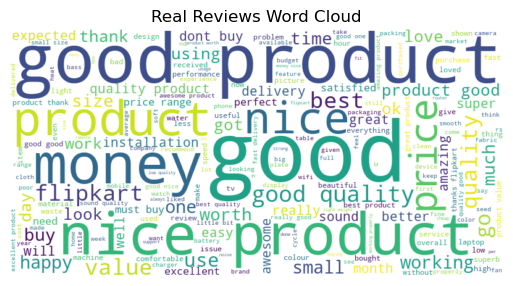

In [20]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title("Real Reviews Word Cloud")
plt.axis('off')

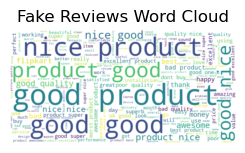

In [21]:
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title("Fake Reviews Word Cloud")
plt.axis('off')
plt.show()

In [22]:
print(df[['Price', 'Rate', 'Review_Type']].describe())
print(df['Review_Type'].value_counts())

               Price
count  189860.000000
mean     4348.121658
std     10204.978324
min         2.000000
25%       339.000000
50%       699.000000
75%      3399.000000
max    101100.000000
fake    107786
real     82074
Name: Review_Type, dtype: int64


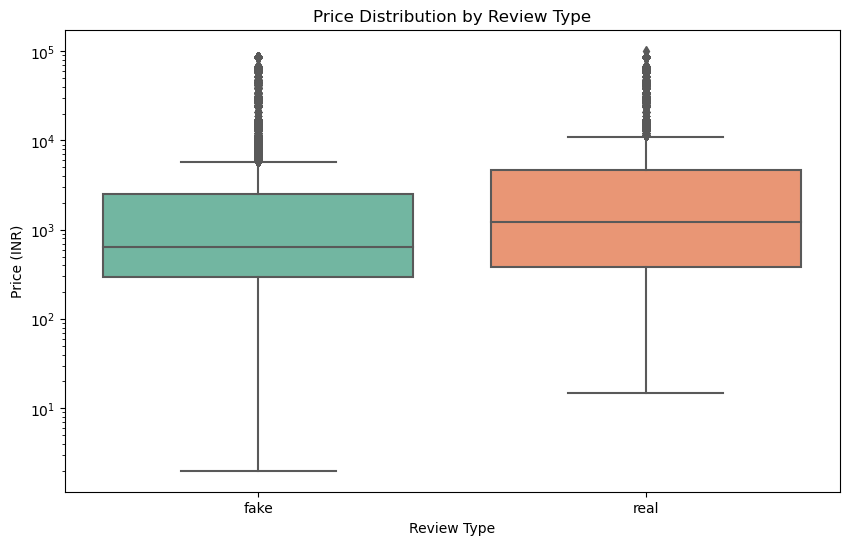

In [23]:
#Price distribution by review type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Review_Type', y='Price', palette='Set2')
plt.title("Price Distribution by Review Type")
plt.ylabel("Price (INR)")
plt.xlabel("Review Type")
plt.yscale("log")  # Handle extreme outliers
plt.show()

Boxplot shows fake reviews are more common in lower-priced products.

Real reviews are spread more evenly across all price ranges.

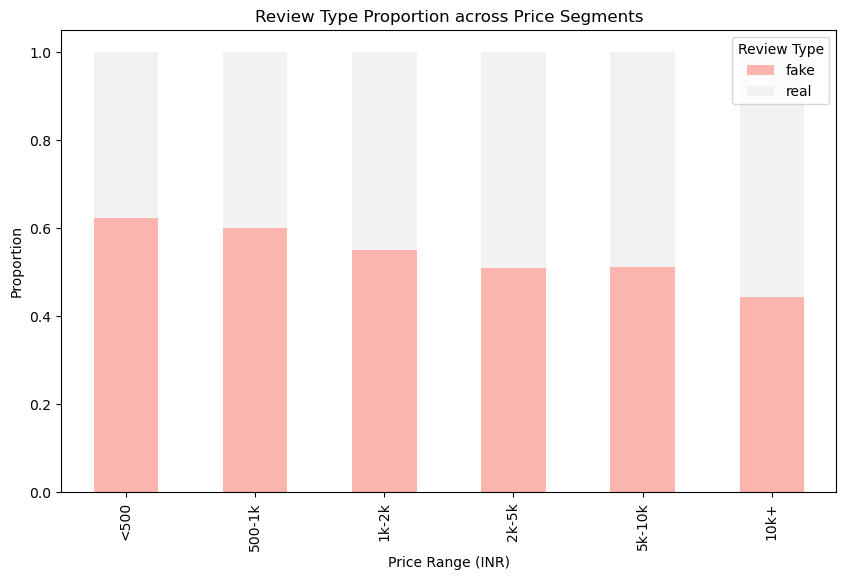

In [25]:
#Fake review rate by price bins 
df['Price_Bin'] = pd.cut(df['Price'], bins=[0, 500, 1000, 2000, 5000, 10000, df['Price'].max()],
                         labels=['<500', '500-1k', '1k-2k', '2k-5k', '5k-10k', '10k+'])
fake_ratio = df.groupby('Price_Bin')['Review_Type'].value_counts(normalize=True).unstack().fillna(0)
fake_ratio.plot(kind='bar', stacked=True, colormap='Pastel1', figsize=(10, 6))
plt.title("Review Type Proportion across Price Segments")
plt.ylabel("Proportion")
plt.xlabel("Price Range (INR)")
plt.legend(title='Review Type')
plt.show()

<₹500 and ₹500-1k segments have a higher proportion of fake reviews.

Expensive products (>₹5k) tend to have more real reviews.

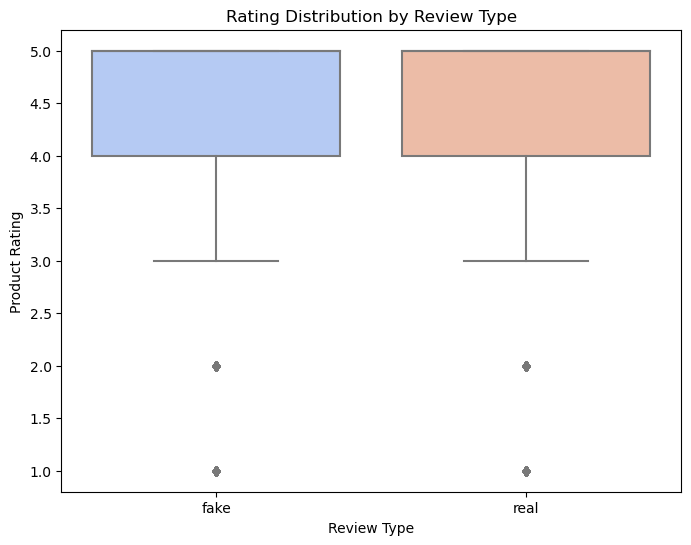

In [27]:
#Average rating per review type 
df['Rate'] = pd.to_numeric(df['Rate'], errors='coerce')
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Review_Type', y='Rate', palette='coolwarm')
plt.title("Rating Distribution by Review Type")
plt.ylabel("Product Rating")
plt.xlabel("Review Type")
plt.show()

Fake reviews often have either very high or very low ratings (polarized).

Real reviews show a wider range of ratings.

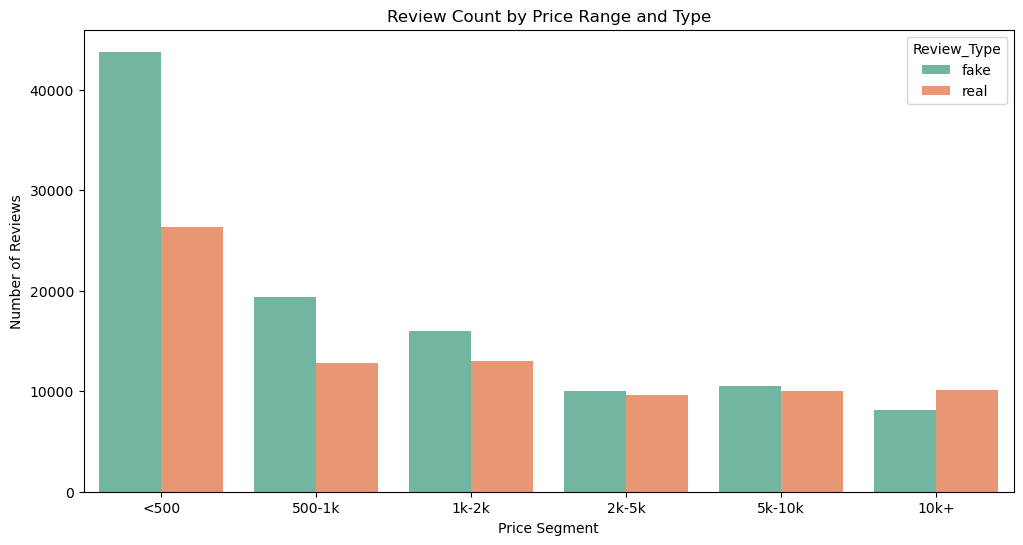

In [29]:
#Count of Reviews by Price Range and Review Type
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Price_Bin', hue='Review_Type', palette='Set2')
plt.title("Review Count by Price Range and Type")
plt.xlabel("Price Segment")
plt.ylabel("Number of Reviews")
plt.show()

Mid-priced products (₹1k–₹2k and ₹2k–₹5k) get the most reviews.

Fake reviews are dense in budget segments – likely to boost sales artificially.